# TIME SERIES ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Getting data

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

**Enter Date Range:**

In [7]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2024-12-01")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

47


**Enter tickers:**

In [9]:
tickers = ['^GSPC']

In [10]:
stocks = yf.download(tickers, start=start_date, end=end_date)
stocks_prices = stocks['Close']

[*********************100%***********************]  1 of 1 completed


In [11]:
stocks_prices.head()

Ticker,^GSPC
Date,
2021-01-04 00:00:00+00:00,3700.649902
2021-01-05 00:00:00+00:00,3726.860107
2021-01-06 00:00:00+00:00,3748.139893
2021-01-07 00:00:00+00:00,3803.790039
2021-01-08 00:00:00+00:00,3824.679932


### Prices:

In [13]:
stocks_prices.columns = ['SP500']
stocks_prices.head()

,SP500
Date,
2021-01-04 00:00:00+00:00,3700.649902
2021-01-05 00:00:00+00:00,3726.860107
2021-01-06 00:00:00+00:00,3748.139893
2021-01-07 00:00:00+00:00,3803.790039
2021-01-08 00:00:00+00:00,3824.679932


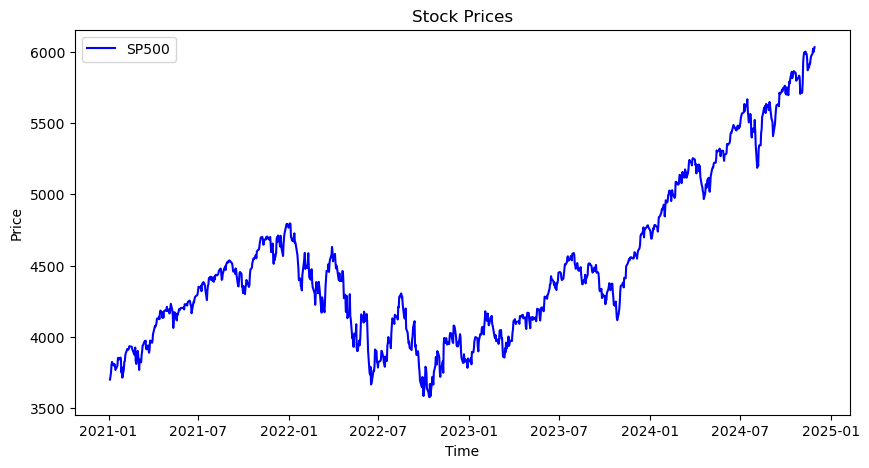

In [14]:
# Plot the prices
plt.figure(figsize=(10, 5))

# Plot stock prices
plt.plot(stocks_prices['SP500'], label='SP500', color='blue')
plt.title('Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

### Price difference:

In [16]:
stocks_prices_diff = stocks_prices['SP500'].diff().reset_index()
stocks_prices_diff.set_index("Date", inplace =True)
stocks_prices_diff.dropna(inplace =True)
stocks_prices_diff.head()

,SP500
Date,
2021-01-05 00:00:00+00:00,26.210205
2021-01-06 00:00:00+00:00,21.279785
2021-01-07 00:00:00+00:00,55.650146
2021-01-08 00:00:00+00:00,20.889893
2021-01-11 00:00:00+00:00,-25.069824


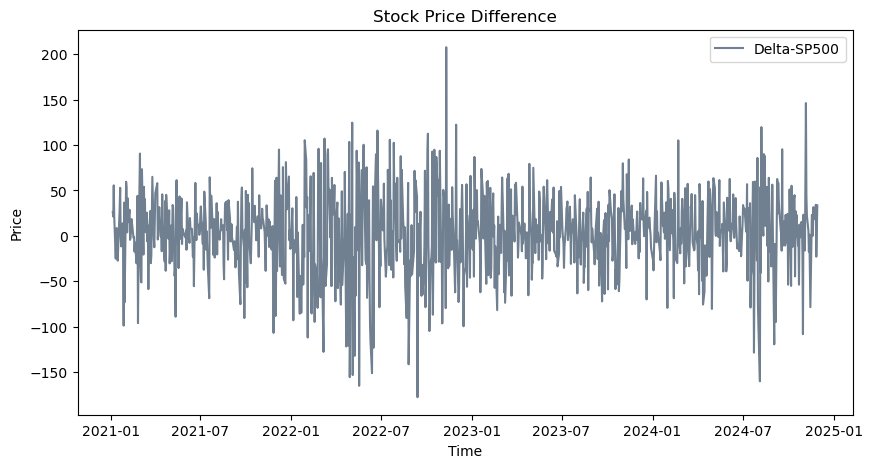

In [17]:
# Plot the price difference
plt.figure(figsize=(10, 5))

# Plot stock prices
plt.plot(stocks_prices_diff['SP500'], label='Delta-SP500', color='slategrey')
plt.title('Stock Price Difference')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

### Price percentage change:

In [19]:
stocks_prices_pct = stocks_prices.pct_change().dropna().mul(100)

In [20]:
stocks_prices_pct.head()

,SP500
Date,
2021-01-05 00:00:00+00:00,0.708260
2021-01-06 00:00:00+00:00,0.570984
2021-01-07 00:00:00+00:00,1.484740
2021-01-08 00:00:00+00:00,0.549186
2021-01-11 00:00:00+00:00,-0.655475


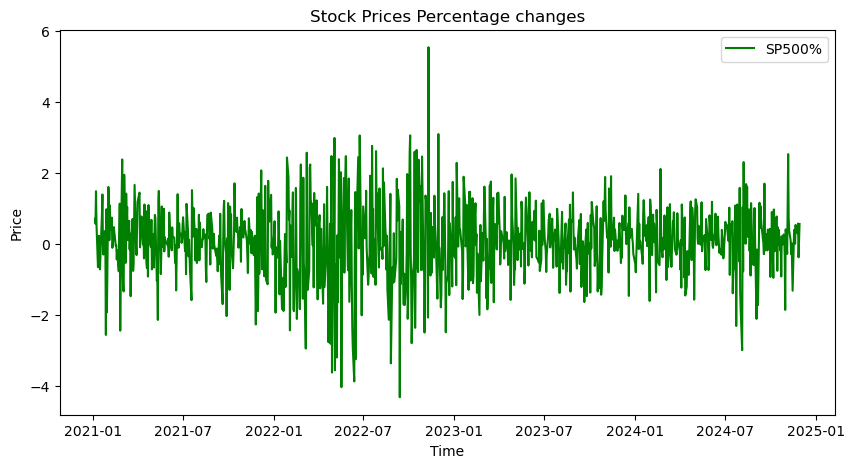

In [21]:
# Plot the price difference
plt.figure(figsize=(10, 5))

# Plot stock prices
plt.plot(stocks_prices_pct['SP500'], label='SP500%', color='green')
plt.title('Stock Prices Percentage changes')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

## WHITE NOISE, RANDOM WALK, STATIONARITY

Comparing prices and pct_change() data

### WHITE NOISE
For a white noise series, the **Autocorrelation Function (ACF) should show no significant autocorrelations at any lag** <br/>
(i.e., the values should be zero for all lags).

**Checking mean and variance**

In [26]:
stocks_prices['SP500'].mean()

4490.080194984995

In [27]:
stocks_prices['SP500'].var()

328898.46700343216

In [28]:
stocks_prices_pct['SP500'].mean()

0.05514613000620628

In [29]:
stocks_prices_pct['SP500'].var()

1.0850737582406704

**Checking autocorrelation**

In [31]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

**Prices:**

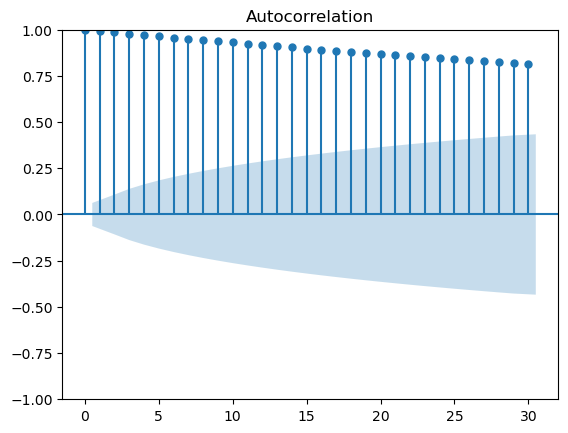

In [33]:
# Plot the ACF
plot_acf(stocks_prices['SP500'], lags=30)
plt.show()

**Percentage change:**

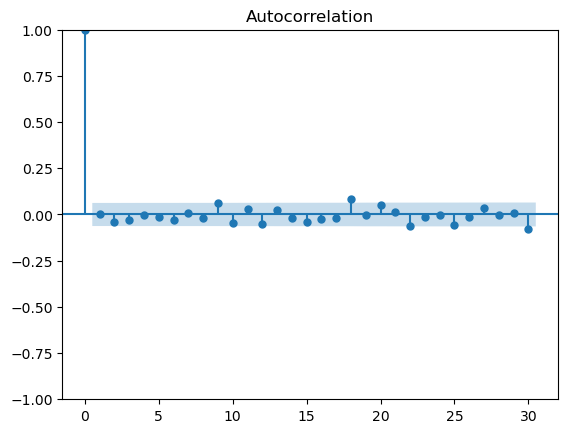

In [35]:
# Plot the ACF
plot_acf(stocks_prices_pct['SP500'], lags=30)
plt.show()

can say stationarity for pct change data

### STATIONARITY

- **Rolling mean and standard deviation should be constant over time.** <br/>

- **Augmented Dickey-Fuller (ADF) Test (if p-value < 0.05, it’s stationary).** 

#### Price

**Enter window size for rolling mean and standard deviation:**

In [40]:
w = 20

In [41]:
rolling_stocks_prices_mean = stocks_prices['SP500'].rolling(window = w).mean()
rolling_stocks_prices_std = stocks_prices['SP500'].rolling(window = w).std()

**Plot**

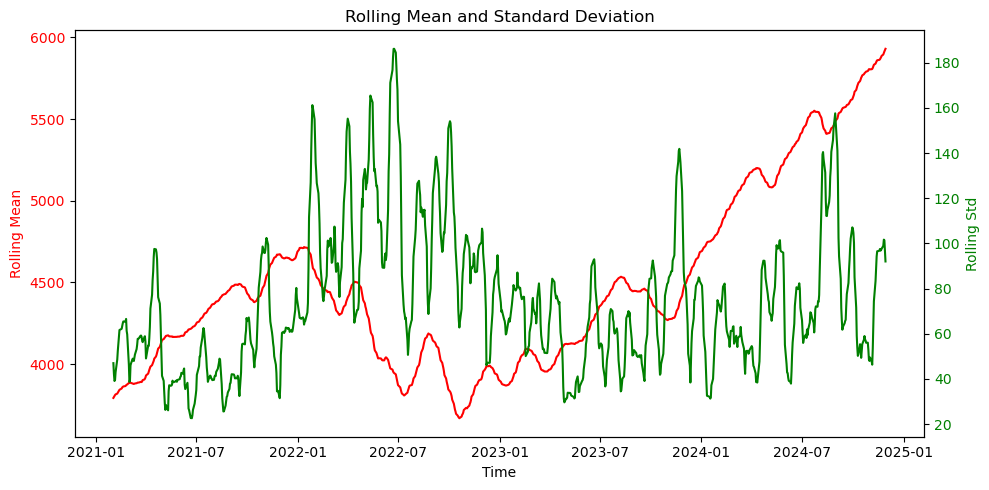

In [43]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot rolling mean on the first axis (left)
ax1.plot(rolling_stocks_prices_mean, label='Rolling Mean', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rolling Mean', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot rolling standard deviation on the second axis (right)
ax2.plot(rolling_stocks_prices_std, label='Rolling Std', color='green')
ax2.set_ylabel('Rolling Std', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and show the plot
plt.title('Rolling Mean and Standard Deviation')
plt.tight_layout()
plt.show()

#### Percent change

**Enter window size for rolling mean and standard deviation:**

In [46]:
w=20

In [47]:
rolling_stocks_pct_mean = stocks_prices_pct['SP500'].rolling(window = w).mean()
rolling_stocks_pct_std = stocks_prices_pct['SP500'].rolling(window = w).std()

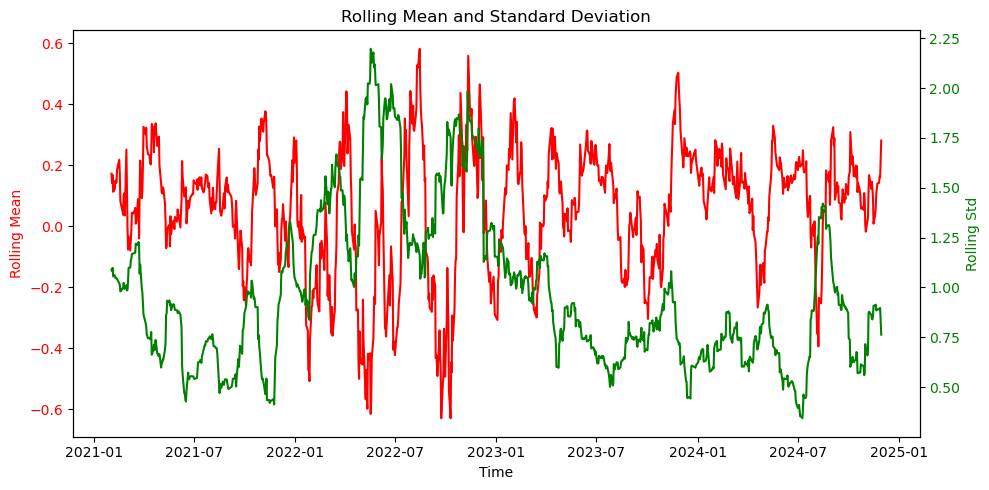

In [48]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot rolling mean on the first axis (left)
ax1.plot(rolling_stocks_pct_mean, label='Rolling Mean', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rolling Mean', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot rolling standard deviation on the second axis (right)
ax2.plot(rolling_stocks_pct_std, label='Rolling Std', color='green')
ax2.set_ylabel('Rolling Std', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and show the plot
plt.title('Rolling Mean and Standard Deviation')
plt.tight_layout()
plt.show()

#### ADF Test (if p-value < 0.05, it’s stationary)

In [50]:
from statsmodels.tsa.stattools import adfuller

**Prices**

In [52]:
# Perform the ADF test
result = adfuller(stocks_prices['SP500'])

In [53]:
# Extract p-value
print("p-value:", result[1])

p-value: 0.94565341065898


p>0.05: The series is non-stationary (has a unit root), which is a key feature of a random walk.

In [55]:
# Check stationarity based on the p-value
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

The series is non-stationary.


**Percent change**

In [57]:
result2 = adfuller(stocks_prices_pct['SP500'])

In [58]:
# Extract p-value
print("p-value:", result2[1])

p-value: 0.0


In [59]:
# Check stationarity based on the p-value
if result2[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

The series is stationary.


### RANDOM WALK
- **Augmented Dickey-Fuller (ADF) Test (if p-value > 0.05, it’s NON stationary).**
- **If differencing makes the series stationary, it’s a random walk.**

Since the differences of prices are stationary, prices are a random walk

# Checking probability distribution

In [63]:
df = stocks_prices_pct.copy().div(100)

In [64]:
df.head()

,SP500
Date,
2021-01-05 00:00:00+00:00,0.007083
2021-01-06 00:00:00+00:00,0.005710
2021-01-07 00:00:00+00:00,0.014847
2021-01-08 00:00:00+00:00,0.005492
2021-01-11 00:00:00+00:00,-0.006555


array([[<Axes: title={'center': 'SP500'}>]], dtype=object)

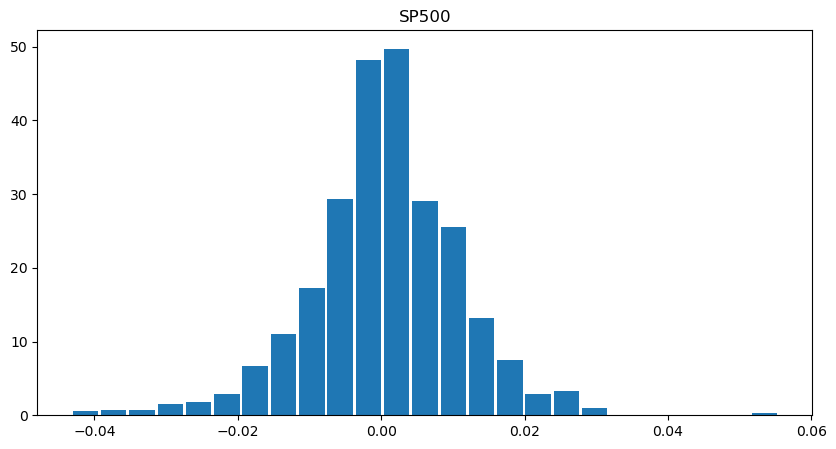

In [65]:
df.hist(bins = 25, figsize=(10,5), grid = False, rwidth =0.9, density = True)